<a href="https://colab.research.google.com/github/jahnavi1thoom/svm-loan-dataset-/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/heart.csv'
df=pd.read_csv(path)
df.head()

Mounted at /content/drive


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#handle missing values
df.dropna(inplace=True)
#encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for col in df.select_dtypes(include=['object']).columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  label_encoders[col]=le

In [22]:
#define features and target variable
x=df.drop('target',axis=1)
y=df['target']

#split dataet into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [24]:
#train SVM with linear Kernal
from sklearn.svm import SVC

svm_linear=SVC(kernel='linear',C=1)
svm_linear.fit(x_train,y_train)
y_pred_linear=svm_linear.predict(x_test)


In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_linear)
cm

array([[72, 30],
       [ 8, 95]])

In [26]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_linear)
accuracy

0.8146341463414634

In [27]:
#train svm with polynomial kernal
from sklearn.svm import SVC
svm_poly=SVC(kernel='poly',degree=3,C=1)
svm_poly.fit(x_train,y_train)
y_pred_poly=svm_poly.predict(x_test)


In [28]:
#accuracy and confusion matrix
cm_poly=confusion_matrix(y_test,y_pred_poly)
accuracy_poly=accuracy_score(y_test,y_pred_poly)
print(cm)
print(accuracy_poly)

[[72 30]
 [ 8 95]]
0.9073170731707317


In [29]:
#train SVM with RBF kernel
from sklearn.svm import SVC
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(x_train,y_train)
y_pred_rbf=svm_rbf.predict(x_test)

In [30]:
#accuracy
cm_rbf=confusion_matrix(y_test,y_pred_rbf)
accuracy_rbf=accuracy_score(y_test,y_pred_rbf)
print(cm_rbf)
print(accuracy_rbf)

[[85 17]
 [ 6 97]]
0.8878048780487805


# Task
The current state of the notebook shows that `df1` (intended for training data) has been scaled and converted to a NumPy array, losing its DataFrame structure and making it unsuitable for the upcoming attribute analysis and visualizations. Additionally, `df` (intended for test data) has been loaded but not yet preprocessed according to the plan.

To properly proceed with the plan, we need to:
1.  Reload the training dataset (`train_u6lujuX_CVtuZ9i.csv`) into a fresh `train_df` DataFrame.
2.  Reload the test dataset (`test_Y3wMUE5_7gLdaTN.csv`) into a fresh `test_df` DataFrame.
3.  Perform an initial data exploration on `train_df` to understand its structure, data types, and the extent of missing values using methods like `.info()`, `.head()`, and `.isnull().sum()`, as per the plan.

This ensures that we start with the correct DataFrame structure for `train_df` before continuing with the preprocessing steps.

```python
# Load Datasets
train_df = pd.read_csv("/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv")
test_df = pd.read_csv("/content/drive/MyDrive/test_Y3wMUE5_7gLdaTN.csv")

print("Train DataFrame head:")
print(train_df.head())
print("\nTest DataFrame head:")
print(test_df.head())

# Initial Data Exploration (Training Data)
print("\nTrain DataFrame Info:")
train_df.info()
print("\nMissing values in Train DataFrame:")
print(train_df.isnull().sum())
```

## Load Datasets

### Subtask:
Load `train_u6lujuX_CVtuZ9i.csv` into `train_df` (for training) and `test_Y3wMUE5_7gLdaTN.csv` into `test_df` (for testing predictions), ensuring both are fresh DataFrames.


**Reasoning**:
Load the training and testing datasets into separate Pandas DataFrames and display their first few rows to verify successful loading.



In [89]:
train_df = pd.read_csv('/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test_Y3wMUE5_7gLdaTN.csv')

print("First 5 rows of train_df:")
print(train_df.head())

print("\nFirst 5 rows of test_df:")
print(test_df.head())

First 5 rows of train_df:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural         

**Reasoning**:
Now that the training and test datasets are loaded, the next step is to perform initial data exploration on the `train_df` to understand its structure, data types, and identify missing values, as outlined in the overall task.



In [90]:
print("\nTrain DataFrame Info:")
train_df.info()
print("\nMissing values in Train DataFrame:")
print(train_df.isnull().sum())


Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Missing values in Train DataFrame:
Loan_ID               0
Gender               13
Marri

In [92]:
#handling categorical data in train_df
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
#handling numerical data in train_df
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    train_df[col] = train_df[col].fillna(train_df[col].median())

print("Missing values in train_df after imputation:")
print(train_df.isnull().sum())

Missing values in train_df after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [93]:
#converting categorical data into numeric data
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns excluding 'Loan_ID' and 'Loan_Status'
categorical_cols = [col for col in train_df.select_dtypes(include=['object']).columns if col not in ['Loan_ID', 'Loan_Status']]

train_label_encoders = {}

# Iterate through categorical columns and apply LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    train_label_encoders[col] = le

print("Train DataFrame after categorical encoding:")
print(train_df.head())


Train DataFrame after categorical encoding:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area Loan_Status  
0             1.0              2           Y  
1             

In [94]:
#input and output variables
x_train = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y_train = train_df['Loan_Status']

y_train = y_train.map({'Y': 1, 'N': 0})

print("First 5 rows of x_train:")
print(x_train.head())
print("\nFirst 5 rows of y_train:")
print(y_train.head())

First 5 rows of x_train:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  
0              2  
1              0  
2              2  
3              

In [95]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform x_train
x_train_scaled = scaler.fit_transform(x_train)

# Convert the scaled array back to a DataFrame with original column names
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

print("First 5 rows of scaled x_train:")
print(x_train.head())

First 5 rows of scaled x_train:
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.472343 -1.372089   -0.737806  -0.528362      -0.392601         0.072991   
1  0.472343  0.728816    0.253470  -0.528362      -0.392601        -0.134412   
2  0.472343  0.728816   -0.737806  -0.528362       2.547117        -0.393747   
3  0.472343  0.728816   -0.737806   1.892641      -0.392601        -0.462062   
4  0.472343 -1.372089   -0.737806  -0.528362      -0.392601         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241          0.273231        0.411733   
1          -0.038732   -0.211241          0.273231        0.411733   
2          -0.554487   -0.948996          0.273231        0.411733   
3           0.251980   -0.306435          0.273231        0.411733   
4          -0.554487   -0.056551          0.273231        0.411733   

   Property_Area  
0       1.223298  
1      -1.318513  
2       1

In [96]:

train_df_temp = pd.read_csv('/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv')

# Calculate modes for categorical columns from train_df_temp
gender_mode = train_df_temp['Gender'].mode()[0]
married_mode = train_df_temp['Married'].mode()[0]
dependents_mode = train_df_temp['Dependents'].mode()[0]
self_employed_mode = train_df_temp['Self_Employed'].mode()[0]

# Calculate medians for numerical columns from train_df_temp
loanamount_median = train_df_temp['LoanAmount'].median()
loan_amount_term_median = train_df_temp['Loan_Amount_Term'].median()
credit_history_median = train_df_temp['Credit_History'].median()

# Impute missing values in test_df using the calculated modes and medians
test_df['Gender'] = test_df['Gender'].fillna(gender_mode)
test_df['Married'] = test_df['Married'].fillna(married_mode)
test_df['Dependents'] = test_df['Dependents'].fillna(dependents_mode)
test_df['Self_Employed'] = test_df['Self_Employed'].fillna(self_employed_mode)
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(loanamount_median)
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(loan_amount_term_median)
test_df['Credit_History'] = test_df['Credit_History'].fillna(credit_history_median)

print("Missing values in test_df after imputation:")
print(test_df.isnull().sum())

Missing values in test_df after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [97]:
for col in categorical_cols:
    if col in test_df.columns:
        test_df[col] = train_label_encoders[col].transform(test_df[col])

print("Test DataFrame after categorical encoding:")
print(test_df.head())

Test DataFrame after categorical encoding:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001015       1        1           0          0              0   
1  LP001022       1        1           1          0              0   
2  LP001031       1        1           2          0              0   
3  LP001035       1        1           2          0              0   
4  LP001051       1        0           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History  Property_Area  
0             1.0              2  
1             1.0              2  
2   

**Reasoning**:
As per the instructions, the 'Loan_ID' column needs to be dropped from `test_df` as it is an identifier and not a feature for model training.



In [98]:
test_df = test_df.drop('Loan_ID', axis=1)

print("Test DataFrame after dropping 'Loan_ID':")
print(test_df.head())

Test DataFrame after dropping 'Loan_ID':
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           0          0              0             5720   
1       1        1           1          0              0             3076   
2       1        1           2          0              0             5000   
3       1        1           2          0              0             2340   
4       1        0           0          1              0             3276   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0       110.0             360.0             1.0   
1               1500       126.0             360.0             1.0   
2               1800       208.0             360.0             1.0   
3               2546       100.0             360.0             1.0   
4                  0        78.0             360.0             1.0   

   Property_Area  
0              2  
1              2  
2              2  

In [99]:
x_test_scaled = scaler.transform(test_df)
x_test = pd.DataFrame(x_test_scaled, columns=test_df.columns)

print("First 5 rows of scaled x_test:")
print(x_test.head())
print("\nMissing values in x_test after scaling:")
print(x_test.isnull().sum())

First 5 rows of scaled x_test:
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.472343  0.728816   -0.737806  -0.528362      -0.392601         0.051857   
1  0.472343  0.728816    0.253470  -0.528362      -0.392601        -0.381297   
2  0.472343  0.728816    1.244745  -0.528362      -0.392601        -0.066097   
3  0.472343  0.728816    1.244745  -0.528362      -0.392601        -0.501872   
4  0.472343 -1.372089   -0.737806   1.892641      -0.392601        -0.348532   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.425428          0.273231        0.411733   
1          -0.041468   -0.235040          0.273231        0.411733   
2           0.061136    0.740701          0.273231        0.411733   
3           0.316278   -0.544421          0.273231        0.411733   
4          -0.554487   -0.806205          0.273231        0.411733   

   Property_Area  
0       1.223298  
1       1.223298  
2       1.

In [100]:
print("\nDescriptive statistics for ApplicantIncome grouped by Loan_Status:")
print(train_df.groupby('Loan_Status')['ApplicantIncome'].describe())

print("\nDescriptive statistics for LoanAmount grouped by Loan_Status:")
print(train_df.groupby('Loan_Status')['LoanAmount'].describe())


Descriptive statistics for ApplicantIncome grouped by Loan_Status:
             count         mean          std    min     25%     50%      75%  \
Loan_Status                                                                    
N            192.0  5446.078125  6819.558528  150.0  2885.0  3833.5  5861.25   
Y            422.0  5384.068720  5765.441615  210.0  2877.5  3812.5  5771.50   

                 max  
Loan_Status           
N            81000.0  
Y            63337.0  

Descriptive statistics for LoanAmount grouped by Loan_Status:
             count        mean        std   min     25%    50%    75%    max
Loan_Status                                                                 
N            192.0  149.890625  83.529056   9.0  102.75  128.0  173.0  570.0
Y            422.0  143.869668  84.400468  17.0  100.00  128.0  160.0  700.0


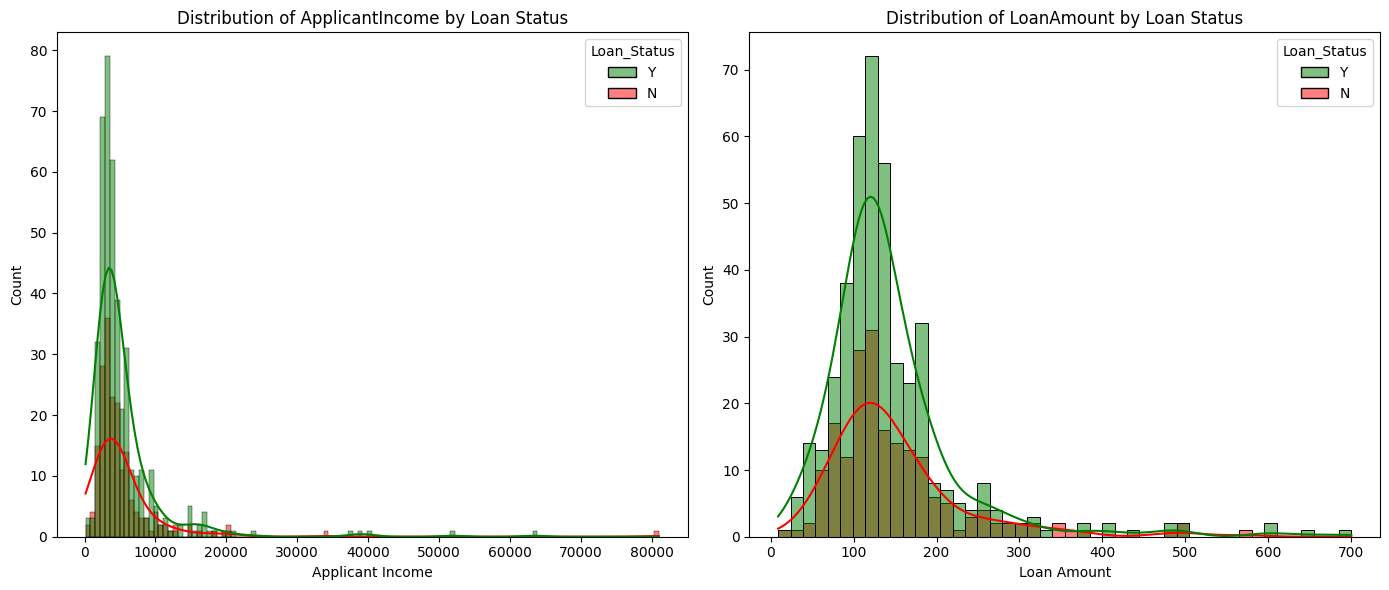

In [101]:
#To visualize the distributions of 'ApplicantIncome' and 'LoanAmount' for approved and rejected loan use histograms, differentiating by 'Loan_Status'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(data=train_df, x='ApplicantIncome', hue='Loan_Status', kde=True, palette={'Y': 'green', 'N': 'red'})
plt.title('Distribution of ApplicantIncome by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(data=train_df, x='LoanAmount', hue='Loan_Status', kde=True, palette={'Y': 'green', 'N': 'red'})
plt.title('Distribution of LoanAmount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

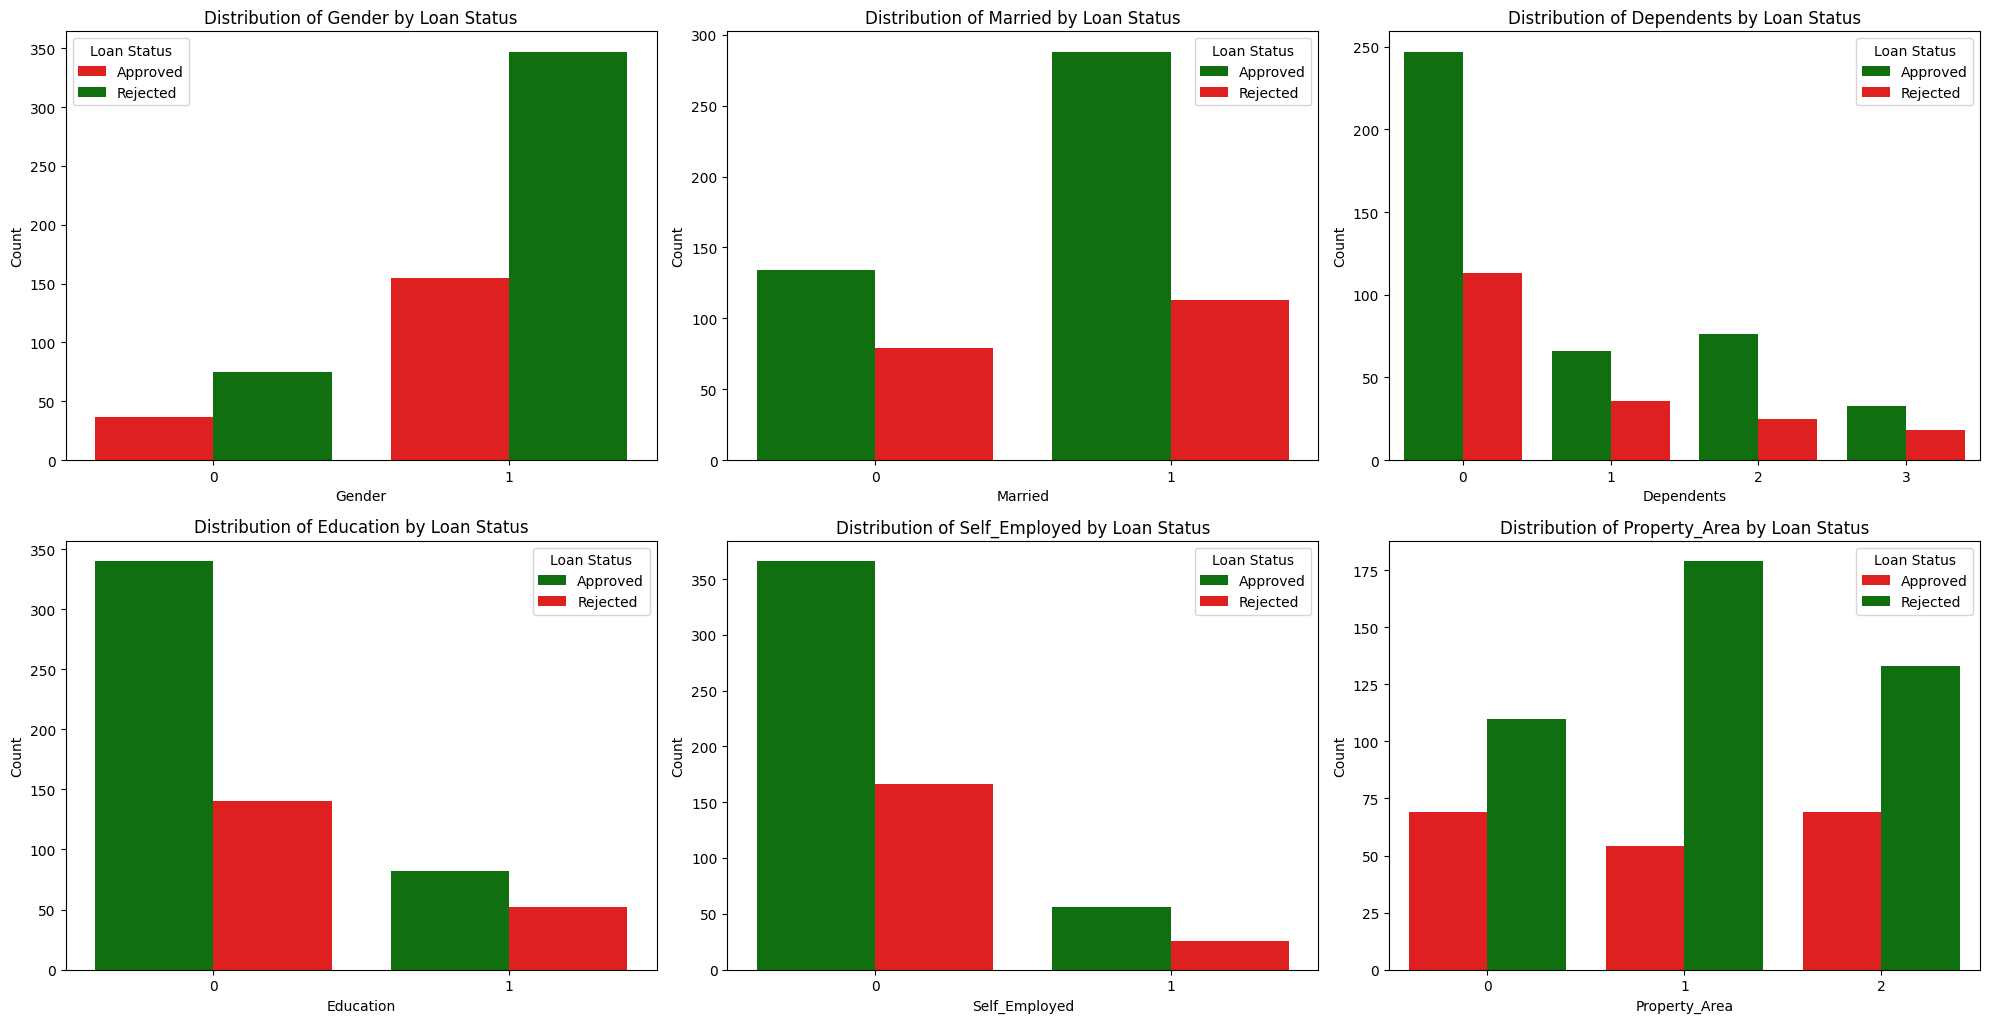

In [104]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1) # Arrange plots in 3 rows, 3 columns
    sns.countplot(data=train_df, x=col, hue='Loan_Status', palette={'Y': 'green', 'N': 'red'})
    plt.title(f'Distribution of {col} by Loan Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', labels=['Approved', 'Rejected'])

plt.tight_layout()
plt.show()

In [112]:
#linear svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split


x_train_split, x_test_eval, y_train_split, y_test_eval = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Instantiate and train the Linear SVM model on the new training split
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(x_train_split, y_train_split)

# Make predictions on the validation set (x_test_eval)
y_pred_linear = svm_linear.predict(x_test_eval)

# Calculate performance metrics using the validation set's true labels (y_test_eval)
accuracy_linear = accuracy_score(y_test_eval, y_pred_linear)
precision_linear = precision_score(y_test_eval, y_pred_linear)

cm_linear = confusion_matrix(y_test_eval, y_pred_linear)

# Print the results
print(f"Linear SVM Accuracy (on validation set): {accuracy_linear:.4f}")
print(f"Linear SVM Precision (on validation set): {precision_linear:.4f}")

print("Linear SVM Confusion Matrix (on validation set):")
print(cm_linear)

Linear SVM Accuracy (on validation set): 0.7886
Linear SVM Precision (on validation set): 0.7596
Linear SVM Confusion Matrix (on validation set):
[[18 25]
 [ 1 79]]


In [111]:
#polynomial svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate and train the Polynomial SVM model
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(x_train_split, y_train_split)

# Make predictions on the validation set
y_pred_poly = svm_poly.predict(x_test_eval)

# Calculate performance metrics
accuracy_poly = accuracy_score(y_test_eval, y_pred_poly)
precision_poly = precision_score(y_test_eval, y_pred_poly)

cm_poly = confusion_matrix(y_test_eval, y_pred_poly)

# Print the results
print(f"Polynomial SVM Accuracy (on validation set): {accuracy_poly:.4f}")
print(f"Polynomial SVM Precision (on validation set): {precision_poly:.4f}")

print("Polynomial SVM Confusion Matrix (on validation set):")
print(cm_poly)

Polynomial SVM Accuracy (on validation set): 0.7805
Polynomial SVM Precision (on validation set): 0.7573
Polynomial SVM Confusion Matrix (on validation set):
[[18 25]
 [ 2 78]]


In [113]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate and train the RBF SVM model
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(x_train_split, y_train_split)

# Make predictions on the validation set
y_pred_rbf = svm_rbf.predict(x_test_eval)

# Calculate performance metrics
accuracy_rbf = accuracy_score(y_test_eval, y_pred_rbf)
precision_rbf = precision_score(y_test_eval, y_pred_rbf)

cm_rbf = confusion_matrix(y_test_eval, y_pred_rbf)

# Print the results
print(f"RBF SVM Accuracy (on validation set): {accuracy_rbf:.4f}")
print(f"RBF SVM Precision (on validation set): {precision_rbf:.4f}")

print("RBF SVM Confusion Matrix (on validation set):")
print(cm_rbf)

RBF SVM Accuracy (on validation set): 0.7886
RBF SVM Precision (on validation set): 0.7596
RBF SVM Confusion Matrix (on validation set):
[[18 25]
 [ 1 79]]


In [109]:
print("Analyzing misclassifications from Confusion Matrices:")

# Extract FP and FN from Linear SVM confusion matrix
fp_linear = cm_linear[0, 1]
fn_linear = cm_linear[1, 0]

print("\nLinear SVM Model:")
print(f"  False Positives (risky customers incorrectly approved): {fp_linear}")
print(f"  False Negatives (eligible customers incorrectly rejected): {fn_linear}")

# Extract FP and FN from RBF SVM confusion matrix
fp_rbf = cm_rbf[0, 1]
fn_rbf = cm_rbf[1, 0]

print("\nRBF SVM Model:")
print(f"  False Positives (risky customers incorrectly approved): {fp_rbf}")
print(f"  False Negatives (eligible customers incorrectly rejected): {fn_rbf}")

Analyzing misclassifications from Confusion Matrices:

Linear SVM Model:
  False Positives (risky customers incorrectly approved): 25
  False Negatives (eligible customers incorrectly rejected): 1

RBF SVM Model:
  False Positives (risky customers incorrectly approved): 25
  False Negatives (eligible customers incorrectly rejected): 1


In [114]:
from sklearn.metrics import recall_score

# Calculate recall for each model
recall_linear = recall_score(y_test_eval, y_pred_linear)
recall_poly = recall_score(y_test_eval, y_pred_poly)
recall_rbf = recall_score(y_test_eval, y_pred_rbf)

# Create a DataFrame to hold the performance metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Linear SVM': [accuracy_linear, precision_linear, recall_linear],
    'Polynomial SVM': [accuracy_poly, precision_poly, recall_poly],
    'RBF SVM': [accuracy_rbf, precision_rbf, recall_rbf]
})

print("Performance Metrics DataFrame:")
print(metrics_df)

Performance Metrics DataFrame:
      Metric  Linear SVM  Polynomial SVM   RBF SVM
0   Accuracy    0.788618        0.780488  0.788618
1  Precision    0.759615        0.757282  0.759615
2     Recall    0.987500        0.975000  0.987500


**Reasoning**:
Now that the performance metrics DataFrame is created, I need to melt it into a long format for easier plotting with Seaborn. Then, I will create a bar chart to visually compare the accuracy, precision, and recall scores of the Linear, Polynomial, and RBF SVM models as requested by the subtask.



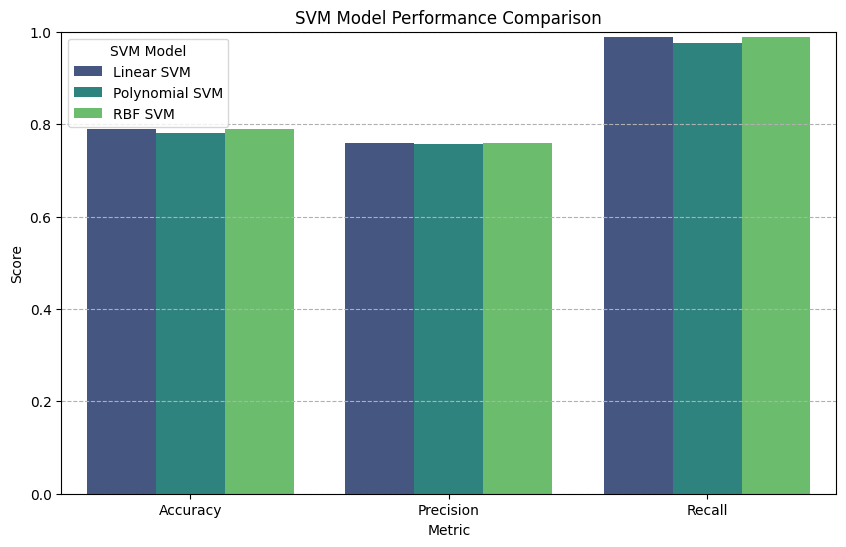

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to a long format for plotting
metrics_melted = metrics_df.melt(id_vars=['Metric'], var_name='Model', value_name='Score')

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('SVM Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for score comparison
plt.legend(title='SVM Model')
plt.grid(axis='y', linestyle='--')
plt.show()
